In [9]:
import numpy as np 
import pandas as pd 
import NewareNDA 
import matplotlib.pyplot as plt 

file_dir = "/home/jovyan/work/General/Group/Data/Neware/"
filenames = ["04042024_AS_C003_Formation.ndax","04042024_AS_C004_Formation.ndax"]
# filenames = ["250021-3-5-191.ndax"]
colors = ['blue','red']

/opt/conda/lib/python3.11/site-packages/NewareNDA/NewareNDAx.py:105: UserWarning: IMPORTANT: This ndax has missing data. The output from NewareNDA contains interpolated data!
  warnings.warn("IMPORTANT: This ndax has missing data. The output from "
/opt/conda/lib/python3.11/site-packages/NewareNDA/NewareNDAx.py:105: UserWarning: IMPORTANT: This ndax has missing data. The output from NewareNDA contains interpolated data!
  warnings.warn("IMPORTANT: This ndax has missing data. The output from "


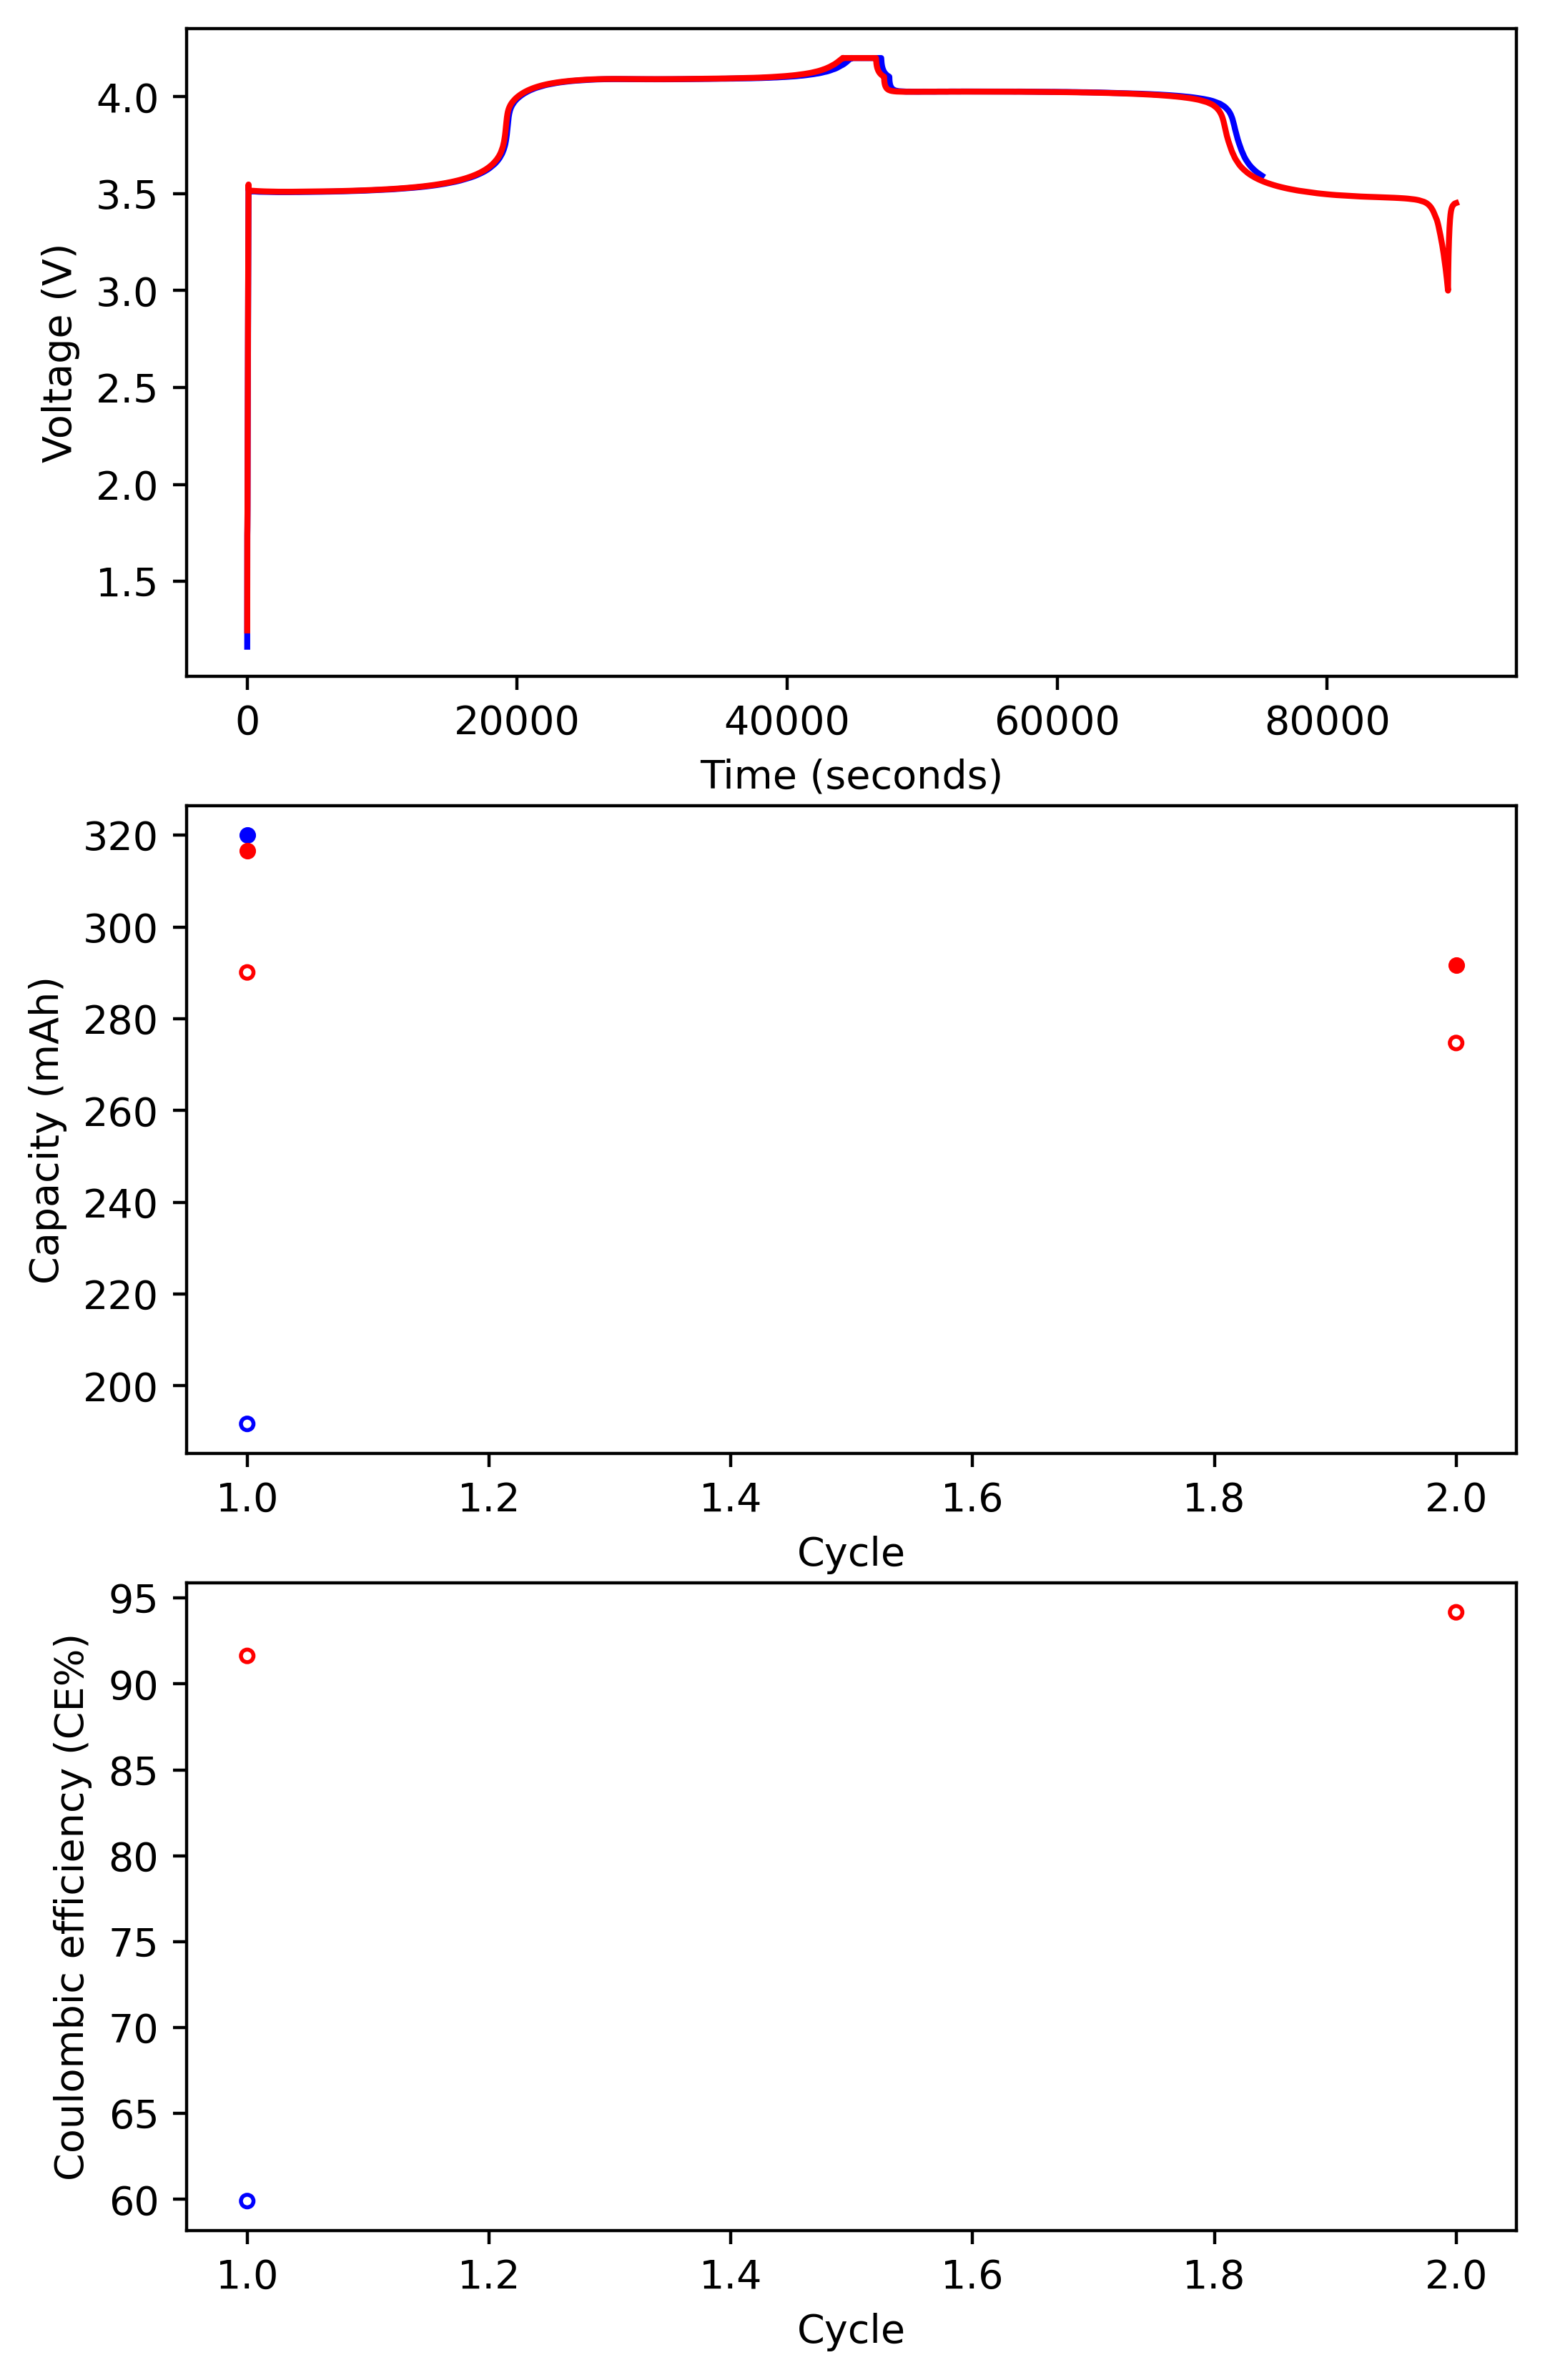

In [10]:
fig1 = plt.figure(dpi=400, figsize = (6, 10))

ax1 = fig1.add_subplot(311)
ax2 = fig1.add_subplot(312)
ax3 = fig1.add_subplot(313)

for i,f in enumerate(filenames): 
    df = NewareNDA.read(file_dir+f)

    # print(df.head())
    # print(df.keys())

    for cycle in df['Cycle'].unique():
        # print(cycle)
        # ax1.scatter(cycle, max(df[df['Cycle']==cycle]['Charge_Capacity(mAh)']), color=colors[i])

        if cycle == 1: 
            # print(df[df['Cycle']==cycle]['Voltage'])
            ax1.plot(df[df['Cycle']==cycle]['Voltage'], color=colors[i])
        
        ax2.scatter(cycle, max(df[df['Cycle']==cycle]['Charge_Capacity(mAh)']), marker = 'o', s = 10, color = colors[i])
        ax2.scatter(cycle, max(df[df['Cycle']==cycle]['Discharge_Capacity(mAh)']), marker = 'o', s = 10, facecolors = 'None', color = colors[i])

        ax3.scatter(cycle, 100*max(df[df['Cycle']==cycle]['Discharge_Capacity(mAh)'])/max(df[df['Cycle']==cycle]['Charge_Capacity(mAh)']), marker = 'o', s = 10, facecolors = 'None', color = colors[i])

#ax2.set_ylim(150, 210)
#ax3.set_ylim(94,101)
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Voltage (V)')

ax2.set_ylabel('Capacity (mAh)')
ax2.set_xlabel('Cycle')

ax3.set_ylabel('Coulombic efficiency (CE%)')
ax3.set_xlabel('Cycle')
plt.show()